In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drug_data = pd.read_csv('/content/drive/Shareddrives/CMPE255/drug_data.csv')

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
drug_data.head(5)

,Unnamed: 0,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,...,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE,METRO,AGECAT,SEX,RACE
0,0,1,865,105,110,2005,1,2,1,2.0,...,4,1,2,8,6,1,2,4,1,2
1,1,2,2077,81,82,283,-8,2,17,67.0,...,3,4,1,4,7,0,2,11,1,3
2,2,3,2313,1,12,-7,-8,2,17,64.0,...,4,3,1,4,1,0,7,11,2,2
3,3,4,234,358,99,215,2,2,17,73.0,...,2,2,1,4,7,0,10,2,1,3
4,4,5,865,105,110,2005,1,2,1,2.0,...,3,4,3,8,8,1,1,6,1,3


In [ ]:
drug_data.columns

Index(['Unnamed: 0', 'CASEID', 'DRUGID_1', 'CATID_1_1', 'CATID_2_1',
       'CATID_3_1', 'ROUTE_1', 'TOXTEST_1', 'sdled_1_1', 'sdled_2_1',
       'sdled_3_1', 'sdled_4_1', 'sdled_5_1', 'sdled_6_1', 'DRUGID_2',
       'CATID_1_2', 'CATID_2_2', 'CATID_3_2', 'ROUTE_2', 'TOXTEST_2',
       'sdled_1_2', 'sdled_2_2', 'sdled_3_2', 'sdled_4_2', 'sdled_5_2',
       'sdled_6_2', 'DRUGID_3', 'CATID_1_3', 'CATID_2_3', 'CATID_3_3',
       'ROUTE_3', 'TOXTEST_3', 'sdled_1_3', 'sdled_2_3', 'sdled_3_3',
       'sdled_4_3', 'sdled_5_3', 'sdled_6_3', 'ALCOHOL', 'NONALCILL', 'PHARMA',
       'NONMEDPHARMA', 'CASEWGT', 'YEAR', 'QUARTER', 'DAYPART', 'NUMSUBS',
       'CASETYPE', 'DISPOSITION', 'ALLABUSE', 'METRO', 'AGECAT', 'SEX',
       'RACE'],
      dtype='object')

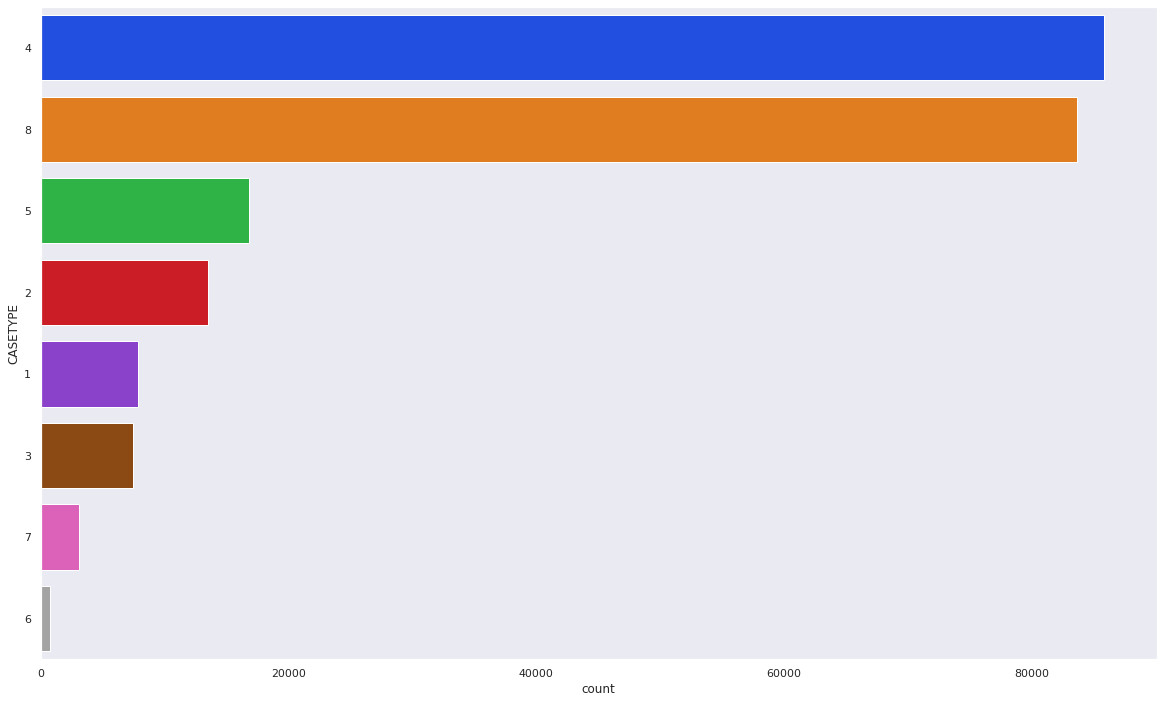

In [25]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="CASETYPE", data=drug_data, palette="bright", order=drug_data['CASETYPE'].value_counts().index[0:15])

In [28]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from wordcloud import WordCloud

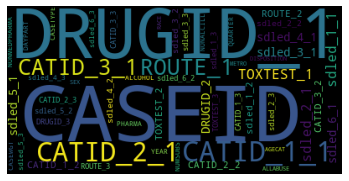

In [30]:
text = open("/content/drive/Shareddrives/CMPE255/drug_data.csv").read()

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

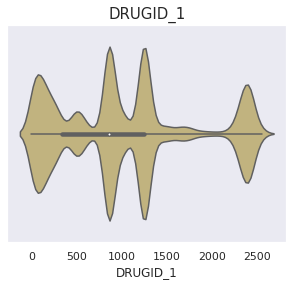

In [31]:
plt.figure(figsize=(5,4))
sns.violinplot(x='DRUGID_1',data=drug_data,color='y');
plt.title("DRUGID_1",{'fontsize':15});

In [32]:
drug_data.columns

Index(['Unnamed: 0', 'CASEID', 'DRUGID_1', 'CATID_1_1', 'CATID_2_1',
       'CATID_3_1', 'ROUTE_1', 'TOXTEST_1', 'sdled_1_1', 'sdled_2_1',
       'sdled_3_1', 'sdled_4_1', 'sdled_5_1', 'sdled_6_1', 'DRUGID_2',
       'CATID_1_2', 'CATID_2_2', 'CATID_3_2', 'ROUTE_2', 'TOXTEST_2',
       'sdled_1_2', 'sdled_2_2', 'sdled_3_2', 'sdled_4_2', 'sdled_5_2',
       'sdled_6_2', 'DRUGID_3', 'CATID_1_3', 'CATID_2_3', 'CATID_3_3',
       'ROUTE_3', 'TOXTEST_3', 'sdled_1_3', 'sdled_2_3', 'sdled_3_3',
       'sdled_4_3', 'sdled_5_3', 'sdled_6_3', 'ALCOHOL', 'NONALCILL', 'PHARMA',
       'NONMEDPHARMA', 'CASEWGT', 'YEAR', 'QUARTER', 'DAYPART', 'NUMSUBS',
       'CASETYPE', 'DISPOSITION', 'ALLABUSE', 'METRO', 'AGECAT', 'SEX',
       'RACE'],
      dtype='object')

In [33]:
features = drug_data[['NONMEDPHARMA', 'sdled_1_1','CASETYPE','NONALCILL', 'ALCOHOL']]
target = drug_data['ALLABUSE']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [38]:

from sklearn.metrics import classification_report
from sklearn import metrics

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
acc = []
model = []
knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      1.00      1.00     24693

    accuracy                           1.00     43790
   macro avg       1.00      1.00      1.00     43790
weighted avg       1.00      1.00      1.00     43790



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(features,target,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

1.0

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23550
           1       1.00      1.00      1.00     31188

    accuracy                           1.00     54738
   macro avg       1.00      1.00      1.00     54738
weighted avg       1.00      1.00      1.00     54738



In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [64]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))


XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23550
           1       1.00      1.00      1.00     31188

    accuracy                           1.00     54738
   macro avg       1.00      1.00      1.00     54738
weighted avg       1.00      1.00      1.00     54738



In [65]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

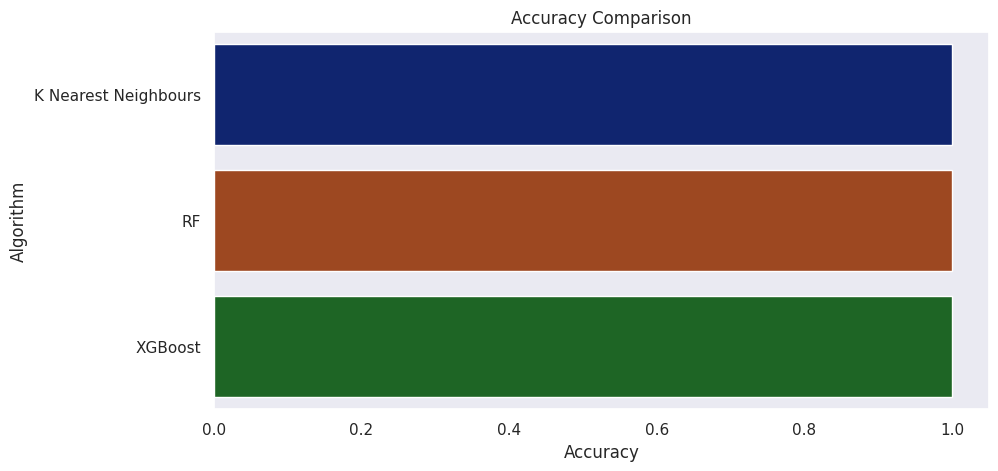

In [66]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')
